In [1]:
import matplotlib.pyplot as plt
import matplotlib
# Set font size and family for the entire figure
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['font.family'] = 'serif'

In [45]:
##Original Dataset: https://onlineacademiccommunity.uvic.ca/isot/2024/12/05/drone-datasets/

In [2]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Set your dataset path
dataset_path = '/content/drive/My Drive/Drone IDS Dataset'

In [ ]:
import os
import pandas as pd

# Create an empty list to hold all DataFrames
all_dataframes = []

# Loop through each folder
for folder_name in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder_name)

    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Loop through each CSV file in the folder
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.csv'):
                file_path = os.path.join(folder_path, file_name)

                # Read CSV
                df = pd.read_csv(file_path)

                # Add Label column
                df['Label'] = folder_name

                # Add to the list
                all_dataframes.append(df)
                print(f"Processed: {file_path}")

# Combine all DataFrames into one big DataFrame
final_df = pd.concat(all_dataframes, ignore_index=True)

Processed: /content/drive/My Drive/Drone IDS Dataset/Injection/Instruction_injection_6_5_14_10mins.pcap.csv
Processed: /content/drive/My Drive/Drone IDS Dataset/Injection/Instruction_injection_8_5_14_4mins.pcap.csv
Processed: /content/drive/My Drive/Drone IDS Dataset/Injection/Instruction_injection_4_5_13_6mins.pcap.csv
Processed: /content/drive/My Drive/Drone IDS Dataset/Injection/Instruction_injection_1_5_13_5mins.pcap.csv
Processed: /content/drive/My Drive/Drone IDS Dataset/Injection/Instruction_injection_3_5_13_10mins.pcap.csv
Processed: /content/drive/My Drive/Drone IDS Dataset/Injection/Instruction_injection_2_5_13_7mins.pcap.csv
Processed: /content/drive/My Drive/Drone IDS Dataset/Injection/Instruction_injection_7_5_14_7mins.pcap.csv
Processed: /content/drive/My Drive/Drone IDS Dataset/Injection/Instruction_injection_5_5_13_10mins.pcap.csv
Processed: /content/drive/My Drive/Drone IDS Dataset/Benign Data/regular_11_5_19.pcap.csv
Processed: /content/drive/My Drive/Drone IDS Datase

In [ ]:
df = final_df.copy()

In [ ]:
df.shape

In [ ]:
df

In [ ]:
df.columns

In [ ]:
df['Label'].value_counts()

Label
Benign Data                  1280814
DoS Attacks                   724702
Password Cracking             231218
Video Interception Attack      77235
Ip Spoofing                     9733
MITM                            8219
Payload Manipulation            6099
Replay Attack                   5860
Unauthorized UDP Packets        5012
Injection                       4743
Name: count, dtype: int64

## **Data Samples per Attack Type**

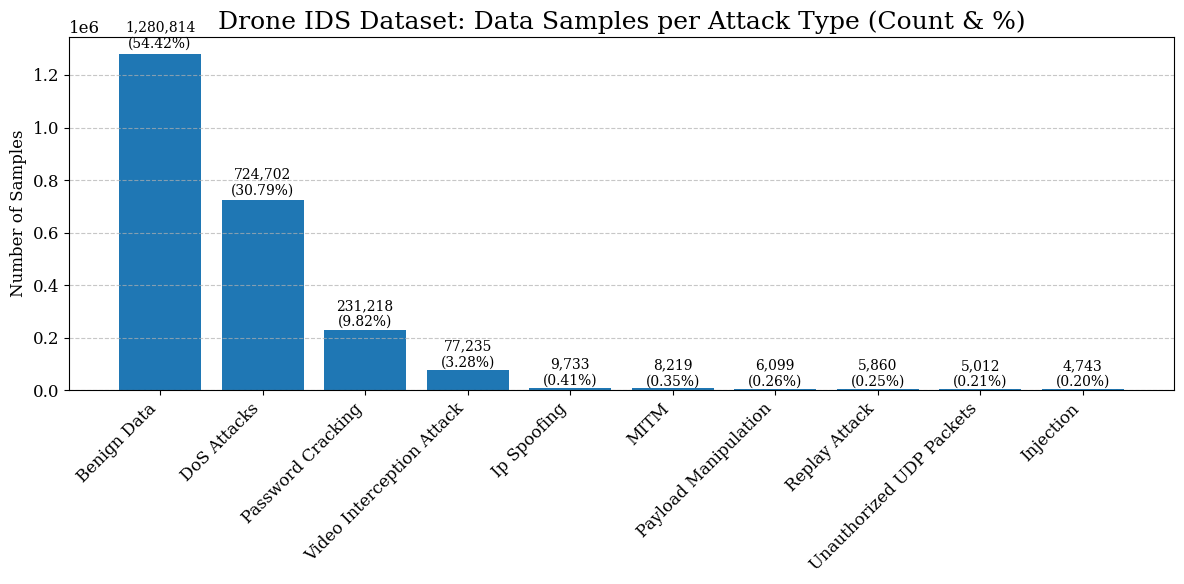

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is final_df

# Count samples and percentages
label_counts = final_df['Label'].value_counts()
label_percentages = (label_counts / label_counts.sum()) * 100

# Set up the plot
plt.figure(figsize=(12, 6))
bars = plt.bar(label_counts.index, label_counts.values)

# Add count and percentage text above each bar
for idx, bar in enumerate(bars):
    height = bar.get_height()
    count_text = f'{label_counts.values[idx]:,}'
    percent_text = f'({label_percentages.values[idx]:.2f}%)'

    plt.text(
        bar.get_x() + bar.get_width()/2, height + 0.01*height,
        f'{count_text}\n{percent_text}',
        ha='center', va='bottom', fontsize=10
    )

# Titles and labels
plt.title('Drone IDS Dataset: Data Samples per Attack Type (Count & %)', fontsize=18)
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

# **Data Preprocessing**

In [ ]:
df

ts  Payload_Length   Var_Payload  Protocol Type  Duration  \
0        1.715711e+09           132.8   4094.177778          15.40     235.9   
1        1.715711e+09           130.0   3835.333333          17.00     255.0   
2        1.715711e+09           118.2   5408.400000          15.40     235.9   
3        1.715711e+09            98.9   6261.877778          17.00     216.8   
4        1.715711e+09           135.1   3318.988889          15.40     235.9   
...               ...             ...           ...            ...       ...   
2353630  1.714999e+09           146.1  41692.100000         802.11       0.0   
2353631  1.714999e+09            36.0   1440.000000         802.11       0.0   
2353632  1.714999e+09           175.2  55003.733333         802.11       0.0   
2353633  1.714999e+09           166.4  55975.822222         802.11       0.0   
2353634  1.714999e+09           512.0           NaN         802.11       0.0   

          Entropy  Drone_port       Rate        Srate      Drate  ...  \
0        4.237329        8889   4.387408  2060.388836   0.000000  ...   
1        4.244133        8889   0.051296     9.356329   0.000000  ...   
2        4.067051        8889   7.099843     8.140859   0.000000  ...   
3        3.589271        8889   0.030064    10.114699   0.829586  ...   
4        4.237941        8889   2.497619     8.652251   0.000000  ...   
...           ...         ...        ...          ...        ...  ...   
2353630  0.000000          -1   8.676875   102.714882  71.134033  ...   
2353631  0.000000          -1  11.675676    47.641908  93.577082  ...   
2353632  0.000000          -1   8.137378   102.749149  71.152969  ...   
2353633  0.000000          -1   5.975670   129.225444  52.444725  ...   
2353634  0.000000          -1   9.578231   187.183271  50.037310  ...   

             Radius    Covariance  Variance  Weight  DS status  Fragments  \
0         94.100473   4457.577208       1.0    50.5        0.0        0.0   
1         78.360839   3416.382603       0.9   232.6        0.0        0.0   
2         62.072281   2642.771512       0.9    50.5        0.0        0.0   
3         92.749620   4781.518838       0.9   232.6        0.0        0.0   
4         87.224712   4062.315905       1.0    50.5        0.0        0.0   
...             ...           ...       ...     ...        ...        ...   
2353630  213.923405  27164.184045       0.9    38.5        0.9        0.2   
2353631  245.271923  30212.847279       1.0   244.6        0.5        0.0   
2353632  276.909625  45916.040880       0.9    38.5        0.9        0.3   
2353633  313.517483  49222.364375       1.0   244.6        0.8        0.2   
2353634    0.000000      0.000000       0.0     1.0        2.0        1.0   

         Sequence number  flow_idle_time  flow_active_time              Label  
0                    0.0    3.431421e+08          0.215194          Injection  
1                    0.0    1.840969e-01          1.043279          Injection  
2                    0.0    1.634746e-01          1.667335          Injection  
3                    0.0    3.431421e+08          1.737858          Injection  
4                    0.0    1.025742e-01          2.802269          Injection  
...                  ...             ...               ...                ...  
2353630            744.7    1.404214e-03        149.990662  Password Cracking  
2353631             41.0    2.147913e-04        149.993993  Password Cracking  
2353632            747.0    2.389121e-03        149.997105  Password Cracking  
2353633            739.0    1.973653e-03        150.001587  Password Cracking  
2353634           2405.0    7.998943e-04        150.008064  Password Cracking  

[2353635 rows x 63 columns]

## **Handle Missing Values**

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only show columns with missing values

print("Columns with Missing Values:\n", missing_values)


Columns with Missing Values:
 Var_Payload     114
IAT            5798
dtype: int64


In [ ]:

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values in numerical columns with median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing values in categorical columns with mode
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify if missing values are filled
print("Missing values after filling:\n", df.isnull().sum().sum())  # Should be 0 if all missing values are handled


Missing values after filling:
 0


In [ ]:
df.shape

(2353635, 63)

In [ ]:
# Print the names of the features (columns)
print(df.columns)

Index(['ts', 'Payload_Length', 'Var_Payload', 'Protocol Type', 'Duration',
       'Entropy', 'Drone_port', 'Rate', 'Srate', 'Drate', 'fin_flag_number',
       'syn_flag_number', 'rst_flag_number', 'psh_flag_number',
       'ack_flag_number', 'urg_flag_number', 'ece_flag_number',
       'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count',
       'rst_count', 'max_duration', 'min_duration', 'sum_duration',
       'average_duration', 'std_duration', 'CoAP', 'HTTP', 'HTTPS', 'DNS',
       'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP',
       'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size',
       'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance',
       'Weight', 'DS status', 'Fragments', 'Sequence number', 'flow_idle_time',
       'flow_active_time', 'Label'],
      dtype='object')


## **Others Processing**

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Preprocessing steps
# Replace infinity and large values with NaNs
#df = df.replace([np.inf, -np.inf], np.nan)
#df = df.replace(to_replace=[r'^(-?\d+\.\d+e\+\d+|-?\d+\.\d+e-\d+|-?\d+\.\d+|-?\d+)$', r'^(-?\d+)$'], value=np.nan, regex=True)

# Drop rows containing NaNs
#df.dropna(inplace=True)

# Separate numerical and categorical columns, excluding the 'Label' column from categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols = cat_cols.difference(['Attack_type'])

# Normalize numerical columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Ensure all categorical values are strings
df[cat_cols] = df[cat_cols].astype(str)

# Encode categorical columns
encoder = LabelEncoder()
df[cat_cols] = df[cat_cols].apply(encoder.fit_transform)

# Display the processed DataFrame
df

ts  Payload_Length  Var_Payload  Protocol Type  Duration  \
0        0.012376       -1.344467    -0.963809      -0.328310  0.767845   
1        0.012377       -1.349965    -0.965303      -0.321481  0.974654   
2        0.012378       -1.373131    -0.956221      -0.328310  0.767845   
3        0.012379       -1.411022    -0.951293      -0.321481  0.561037   
4        0.012379       -1.339952    -0.968284      -0.328310  0.767845   
...           ...             ...          ...            ...       ...   
2353630 -0.920803       -1.318356    -0.746734       3.029197 -1.786405   
2353631 -0.920803       -1.534510    -0.979133       3.029197 -1.786405   
2353632 -0.920803       -1.261226    -0.669879       3.029197 -1.786405   
2353633 -0.920803       -1.278502    -0.664266       3.029197 -1.786405   
2353634 -0.920803       -0.600003    -0.306514       3.029197 -1.786405   

          Entropy  Drone_port      Rate     Srate     Drate  ...    Radius  \
0        0.004999   -1.035199 -0.375542 -0.099503 -0.006207  ... -0.869851   
1        0.006928   -1.035199 -0.393431 -0.109782 -0.006207  ... -0.919690   
2       -0.043289   -1.035199 -0.364352 -0.109788 -0.006207  ... -0.971268   
3       -0.178778   -1.035199 -0.393518 -0.109779 -0.006069  ... -0.874128   
4        0.005172   -1.035199 -0.383338 -0.109786 -0.006207  ... -0.891623   
...           ...         ...       ...       ...       ...  ...       ...   
2353630 -1.196624   -1.350847 -0.357846 -0.109314  0.005622  ... -0.490432   
2353631 -1.196624   -1.350847 -0.345474 -0.109590  0.009355  ... -0.391167   
2353632 -1.196624   -1.350847 -0.360072 -0.109314  0.005625  ... -0.290986   
2353633 -1.196624   -1.350847 -0.368990 -0.109182  0.002514  ... -0.175068   
2353634 -1.196624   -1.350847 -0.354127 -0.108891  0.002114  ... -1.167819   

         Covariance  Variance    Weight  DS status  Fragments  \
0         -0.981442  0.975516 -0.986062  -0.298820  -0.266606   
1         -0.989241  0.732855  0.986825  -0.298820  -0.266606   
2         -0.995036  0.732855 -0.986062  -0.298820  -0.266606   
3         -0.979016  0.732855  0.986825  -0.298820  -0.266606   
4         -0.984403  0.975516 -0.986062  -0.298820  -0.266606   
...             ...       ...       ...        ...        ...   
2353630   -0.811357  0.732855 -1.116071   3.226382   2.370755   
2353631   -0.788521  0.975516  1.116834   1.659626  -0.266606   
2353632   -0.670896  0.732855 -1.116071   3.226382   3.689436   
2353633   -0.646130  0.975516  1.116834   2.834693   2.370755   
2353634   -1.014832 -1.451088 -1.522349   7.534963  12.920201   

         Sequence number  flow_idle_time  flow_active_time  Label  
0              -0.264201       -0.013820         -0.444337      2  
1              -0.264201       -0.521517         -0.431961      2  
2              -0.264201       -0.521517         -0.422634      2  
3              -0.264201       -0.013820         -0.421580      2  
4              -0.264201       -0.521517         -0.405672      2  
...                  ...             ...               ...    ...  
2353630         2.169013       -0.521517          1.794153      5  
2353631        -0.130239       -0.521517          1.794203      5  
2353632         2.176528       -0.521517          1.794249      5  
2353633         2.150389       -0.521517          1.794316      5  
2353634         7.593836       -0.521517          1.794413      5  

[2353635 rows x 63 columns]

In [ ]:
X = df.drop(columns=['Label'])
y = df['Label']

In [ ]:
df.shape

(2353635, 63)

In [ ]:
df['Label'].value_counts()

Label
0    1280814
1     724702
5     231218
9      77235
3       9733
4       8219
6       6099
7       5860
8       5012
2       4743
Name: count, dtype: int64

## **Save the dataset**

In [ ]:
# Define the output path
output_path = '/content/drive/MyDrive/Drone IDS Dataset Processed/updated_drone_ids_dataset.csv'

# Save the preprocessed DataFrame
df.to_csv(output_path, index=False)

print(f"Preprocessed CSV file saved to: {output_path}")


In [5]:
import pandas as pd

# Define the path to the saved CSV file
csv_path = '/content/drive/MyDrive/Drone IDS Dataset Processed/updated_drone_ids_dataset.csv'

# Read the CSV into a DataFrame
df = pd.read_csv(csv_path)

# Print the DataFrame
print(df)


              ts  Payload_Length  Var_Payload  Protocol Type  Duration  \
0       0.009172       -1.348014    -0.966191      -0.328831  0.765486   
1       0.009173       -1.353516    -0.967686      -0.322009  0.972344   
2       0.009174       -1.376699    -0.958604      -0.328831  0.765486   
3       0.009175       -1.414617    -0.953677      -0.322009  0.558629   
4       0.009175       -1.343496    -0.970667      -0.328831  0.765486   
...          ...             ...          ...            ...       ...   
301550 -0.923558       -1.209701    -0.592404       3.025035 -1.789361   
301551 -0.924390       -1.608923    -0.989828       3.025035 -1.789361   
301552 -0.924457       -1.454107    -0.851728       3.025035 -1.789361   
301553 -0.922854       -1.572773    -0.984650       3.025035 -1.789361   
301554 -0.925063       -1.200467    -0.617494       3.025035 -1.789361   

         Entropy  Drone_port      Rate     Srate     Drate  ...    Radius  \
0       0.002137   -1.037673 -0.37

In [6]:
df['Label'].value_counts()

Label
0    89648
9    77226
1    71898
5    23122
3     9732
4     8218
6     6099
7     5859
8     5011
2     4742
Name: count, dtype: int64

# **A Lightweight Temporal-Spatial Transformer for Drone Intrusion Detection**

# **For Multiclass Classification**

## **Model Development**

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import classification_report

# === STEP 1: Preprocessing ===
# Separate numerical and categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.difference(['Label'])
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# One-hot encode categorical features
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat_encoded = ohe.fit_transform(df[cat_cols])

# Normalize numerical features
scaler = StandardScaler()
num_scaled = scaler.fit_transform(df[num_cols])

# Combine features
X = np.hstack([num_scaled, cat_encoded])
y = df['Label']

# Encode target labels to integers
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
target_names = encoder.classes_

# === STEP 2: Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded,
                                                    test_size=0.2, random_state=42, stratify=y_encoded)

# === STEP 3: Define lightweight Transformer ===
def build_lightweight_transformer(input_dim, num_classes):
    inputs = layers.Input(shape=(input_dim,))
    x = layers.Dense(128, activation='relu')(inputs)
    x = layers.Reshape((16, 8))(x)  # reshape to (sequence_length, feature_dim)
    x = layers.LayerNormalization()(x)
    x = layers.MultiHeadAttention(num_heads=2, key_dim=4)(x, x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs, outputs)
    return model

num_classes = len(np.unique(y_encoded))
model = build_lightweight_transformer(X_train.shape[1], num_classes)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# === STEP 4: Train the model ===
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=512,
                    validation_split=0.2, callbacks=[early_stop], verbose=2)

# === STEP 5: Evaluate the model ===
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# === STEP 6: Generate predictions ===
y_pred = np.argmax(model.predict(X_test), axis=1)

# === STEP 7: Classification report as DataFrame ===
report_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Format numeric columns
for col in report_df.columns:
    if pd.api.types.is_numeric_dtype(report_df[col]):
        report_df[col] = report_df[col].map(lambda x: f"{x:.5f}")

# Print report table
print("\nClassification Report:\n", report_df)


Epoch 1/50
377/377 - 16s - 42ms/step - accuracy: 0.8492 - loss: 0.4395 - val_accuracy: 0.9982 - val_loss: 0.0263
Epoch 2/50
377/377 - 10s - 26ms/step - accuracy: 0.9968 - loss: 0.0166 - val_accuracy: 0.9996 - val_loss: 0.0022
Epoch 3/50
377/377 - 9s - 24ms/step - accuracy: 0.9992 - loss: 0.0051 - val_accuracy: 0.9996 - val_loss: 0.0022
Epoch 4/50
377/377 - 9s - 25ms/step - accuracy: 0.9988 - loss: 0.0047 - val_accuracy: 0.9998 - val_loss: 0.0011
Epoch 5/50
377/377 - 11s - 30ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9987 - val_loss: 0.0048
Epoch 6/50
377/377 - 9s - 24ms/step - accuracy: 0.9996 - loss: 0.0019 - val_accuracy: 0.9996 - val_loss: 0.0013
Epoch 7/50
377/377 - 9s - 24ms/step - accuracy: 0.9996 - loss: 0.0016 - val_accuracy: 0.9992 - val_loss: 0.0029
Epoch 8/50
377/377 - 12s - 33ms/step - accuracy: 0.9997 - loss: 0.0016 - val_accuracy: 0.9997 - val_loss: 9.0492e-04
Epoch 9/50
377/377 - 11s - 29ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 0.9998 - 

## **Accuracy and Loss**

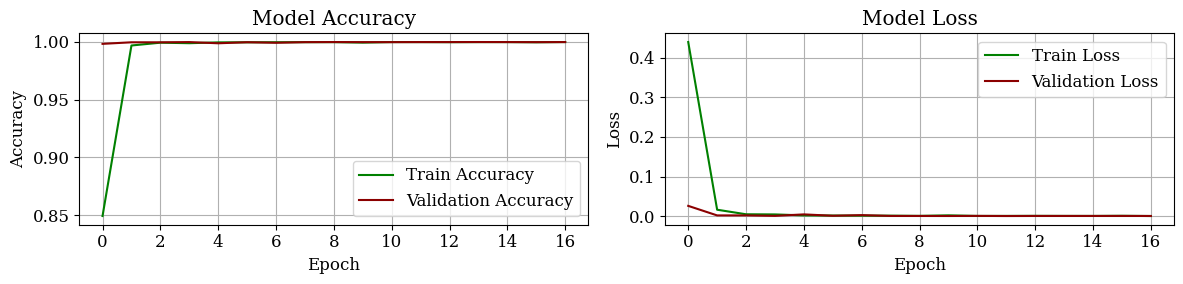

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# === 1. Plot training accuracy and loss curves ===
plt.figure(figsize=(12, 3))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='darkred')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)  # Add grid

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='green')
plt.plot(history.history['val_loss'], label='Validation Loss', color='darkred')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)  # Add grid

plt.tight_layout()
plt.show()


## **Confusion Matrix**

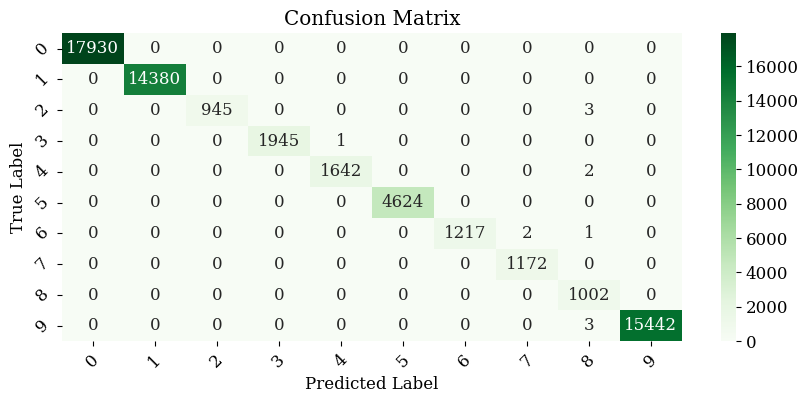

In [9]:
# === 2. Confusion matrix heatmap ===
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

## **Others Metrics**

In [10]:
import time
import numpy as np

# === 1. Count trainable parameters ===
trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_weights])
print(f"\nTrainable Parameters: {trainable_params:,}")

# === 2. Estimate model memory size ===
def get_model_size(model):
    param_size = 0
    for variable in model.trainable_weights:
        param_size += np.prod(variable.shape) * 4  # float32 = 4 bytes
    size_in_mb = param_size / (1024 ** 2)
    return size_in_mb

model_size_mb = get_model_size(model)
print(f"Approximate Model Memory Size: {model_size_mb:.2f} MB")

# === 3. Measure training time per epoch ===
epoch_times = history.history.get('epoch_times', None)
if epoch_times:
    avg_epoch_time = np.mean(epoch_times)
    print(f"Average Training Time per Epoch: {avg_epoch_time:.2f} sec")
else:
    print("Note: epoch_times not recorded; consider using a custom callback to track.")

# === 4. Measure total training time ===
# If using built-in timing, skip; otherwise, approximate:
num_epochs = len(history.history['loss'])
if epoch_times:
    total_train_time = np.sum(epoch_times)
else:
    total_train_time = 'Unknown (not tracked)'
print(f"Total Training Time: {total_train_time}")

# === 5. Measure inference time (testing time) ===
batch_size = 512
num_samples = X_test.shape[0]
num_batches = int(np.ceil(num_samples / batch_size))

start_time = time.time()
model.predict(X_test, batch_size=batch_size, verbose=0)
end_time = time.time()

total_infer_time = end_time - start_time
avg_infer_time_per_sample = total_infer_time / num_samples
avg_infer_time_per_batch = total_infer_time / num_batches

print(f"Total Inference Time: {total_infer_time:.4f} sec")
print(f"Average Inference Time per Sample: {avg_infer_time_per_sample * 1000:.4f} ms")
print(f"Average Inference Time per Batch: {avg_infer_time_per_batch:.4f} sec")


Trainable Parameters: 9,722
Approximate Model Memory Size: 0.04 MB
Note: epoch_times not recorded; consider using a custom callback to track.
Total Training Time: Unknown (not tracked)
Total Inference Time: 1.1462 sec
Average Inference Time per Sample: 0.0190 ms
Average Inference Time per Batch: 0.0097 sec


## **XAI (SHAP and LIME)**

In [11]:
!pip install shap lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=b5296026e9663ac3abebe80b065daf988b8deb4d1e552dfefba6e34d8946f4d1
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime



=== SHAP Explainability ===
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step 


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


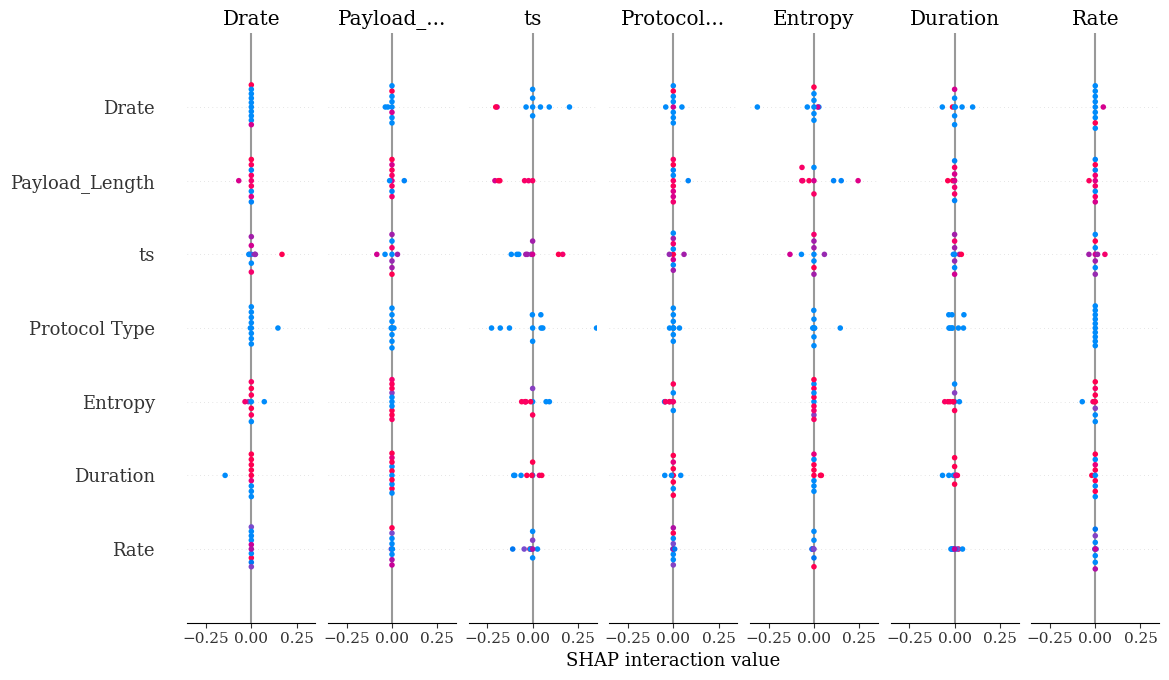

In [12]:
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# === XAI: SHAP & LIME ===

# === SHAP for Global Interpretability ===
print("\n=== SHAP Explainability ===")

# Use KernelExplainer for non-tree models
explainer_shap = shap.KernelExplainer(model.predict, X_train[:100])  # use a subset for background
shap_values = explainer_shap.shap_values(X_test[:10], nsamples=100)

# Plot SHAP summary (for class 0 or general)
shap.summary_plot(shap_values, X_test[:10], feature_names=list(num_cols) + list(ohe.get_feature_names_out(cat_cols)))

In [13]:

# === LIME for Local Interpretability ===
print("\n=== LIME Explainability ===")

# Create LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=list(num_cols) + list(ohe.get_feature_names_out(cat_cols)),
    class_names=target_names,
    mode='classification'
)

# Choose an instance to explain
i = 5
exp = lime_explainer.explain_instance(
    data_row=X_test[i],
    predict_fn=lambda x: model.predict(x),
    num_features=10
)

# Show LIME explanation in notebook
exp.show_in_notebook(show_table=True)

# Optional: save as HTML
# exp.save_to_file("lime_explanation_instance_5.html")


=== LIME Explainability ===
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


## **Error Analysis (Misclassified Samples Summary)**

In [17]:
# Indices of misclassified samples
misclassified_idx = np.where(y_test != y_pred)[0]

# DataFrame of misclassifications
error_df = pd.DataFrame({
    'True Label': encoder.inverse_transform(y_test[misclassified_idx]),
    'Predicted Label': encoder.inverse_transform(y_pred[misclassified_idx])
})

# Summary table
error_summary = (
    error_df.groupby(['True Label', 'Predicted Label'])
            .size()
            .reset_index(name='Count')
            .sort_values('Count', ascending=False)
)

from IPython.display import display
display(error_summary)


True Label  Predicted Label  Count
0           2                8      3
5           9                8      3
3           6                7      2
2           4                8      2
1           3                4      1
4           6                8      1

## **Error Analysis (Class-wise Error Rate)**

In [18]:
from collections import Counter
from IPython.display import display

# Support count for each class
support_counts = Counter(y_test)
error_counts = Counter(y_test[misclassified_idx])

# Class-wise error rates
error_rates = {
    target_names[k]: (error_counts[k] / support_counts[k]) * 100
    for k in support_counts
}

error_rate_df = (
    pd.DataFrame.from_dict(error_rates, orient='index', columns=['Error Rate (%)'])
      .sort_values('Error Rate (%)', ascending=False)
)

display(error_rate_df)


Error Rate (%)
2        0.316456
6        0.245902
4        0.121655
3        0.051387
9        0.019424
1        0.000000
5        0.000000
0        0.000000
7        0.000000
8        0.000000

### **Analyze Worst-Class Errors with LIME**

In [19]:
# Get worst-performing class
worst_class = error_rate_df.index[0]
worst_class_idx = encoder.transform([worst_class])[0]

# Find first error of that class
sample_index = misclassified_idx[np.where(y_test[misclassified_idx] == worst_class_idx)[0][0]]

# Use LIME to explain it
exp = lime_explainer.explain_instance(
    data_row=X_test[sample_index],
    predict_fn=lambda x: model.predict(x),
    num_features=10
)
exp.show_in_notebook(show_table=True)


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


## **Save the Model**

In [21]:
# Define your path and save model as .h5
model_save_path = "/content/drive/MyDrive/Drone IDS Dataset Processed/drone_transformer_model_SMorph.h5"

# Save the model
model.save(model_save_path)

print(f" Model saved at: {model_save_path}")


 Model saved at: /content/drive/MyDrive/Drone IDS Dataset Processed/drone_transformer_model_SMorph.h5


# **For Anomay Detection**

In [23]:
df['Label'] = df['Label'].apply(lambda x: 0 if x == 0 else 1)

In [24]:
df['Label'].value_counts()

Label
1    211907
0     89648
Name: count, dtype: int64

In [25]:
X = df.drop(columns=['Label'])
y = df['Label']

## **Model Development**

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import classification_report

# === STEP 1: Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === STEP 2: Build lightweight binary Transformer model ===
def build_binary_transformer(input_dim):
    inputs = layers.Input(shape=(input_dim,))
    x = layers.Dense(128, activation='relu')(inputs)
    x = layers.Reshape((16, 8))(x)  # reshape to (sequence_length, feature_dim)
    x = layers.LayerNormalization()(x)
    x = layers.MultiHeadAttention(num_heads=2, key_dim=4)(x, x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = models.Model(inputs, outputs)
    return model

# === STEP 3: Compile the model ===
model = build_binary_transformer(X_train.shape[1])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# === STEP 4: Train the model ===
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=512,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=2
)

# === STEP 5: Evaluate on test set ===
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nBinary Test Accuracy: {test_acc:.4f}")

Epoch 1/50
377/377 - 19s - 50ms/step - accuracy: 0.9816 - loss: 0.0649 - val_accuracy: 0.9997 - val_loss: 9.8703e-04
Epoch 2/50
377/377 - 12s - 33ms/step - accuracy: 0.9998 - loss: 7.9076e-04 - val_accuracy: 0.9999 - val_loss: 3.8155e-04
Epoch 3/50
377/377 - 18s - 49ms/step - accuracy: 0.9998 - loss: 6.5671e-04 - val_accuracy: 0.9999 - val_loss: 5.2642e-04
Epoch 4/50
377/377 - 16s - 44ms/step - accuracy: 0.9999 - loss: 4.9429e-04 - val_accuracy: 0.9999 - val_loss: 3.7122e-04
Epoch 5/50
377/377 - 17s - 45ms/step - accuracy: 0.9999 - loss: 4.0449e-04 - val_accuracy: 0.9999 - val_loss: 3.1555e-04
Epoch 6/50
377/377 - 13s - 33ms/step - accuracy: 0.9999 - loss: 3.7728e-04 - val_accuracy: 0.9999 - val_loss: 2.9923e-04
Epoch 7/50
377/377 - 10s - 27ms/step - accuracy: 0.9999 - loss: 3.9979e-04 - val_accuracy: 0.9999 - val_loss: 5.1458e-04
Epoch 8/50
377/377 - 8s - 21ms/step - accuracy: 0.9999 - loss: 2.7035e-04 - val_accuracy: 0.9999 - val_loss: 3.4958e-04
Epoch 9/50
377/377 - 10s - 27ms/step 

### **Classification Report**

In [32]:
# === Predictions ===
y_prob = model.predict(X_test)
y_pred = (y_prob >= 0.5).astype(int)

# === Classification Report with 5-digit precision ===
print("\n=== Classification Report (5-decimal precision) ===")
print(classification_report(y_test, y_pred, digits=5))


1885/1885 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step

=== Classification Report (5-decimal precision) ===
              precision    recall  f1-score   support

           0    0.99983   0.99978   0.99980     17930
           1    0.99991   0.99993   0.99992     42381

    accuracy                        0.99988     60311
   macro avg    0.99987   0.99985   0.99986     60311
weighted avg    0.99988   0.99988   0.99988     60311



### **Training accuracy and loss curves**

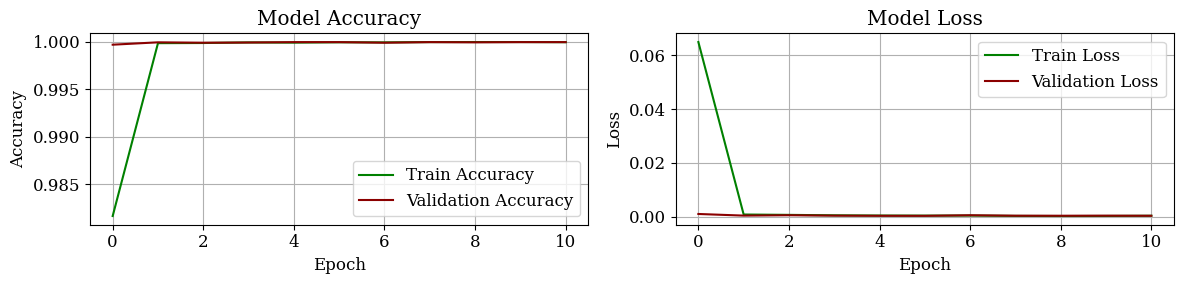

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# === 1. Plot training accuracy and loss curves ===
plt.figure(figsize=(12, 3))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='darkred')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)  # Add grid

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='green')
plt.plot(history.history['val_loss'], label='Validation Loss', color='darkred')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)  # Add grid

plt.tight_layout()
plt.show()


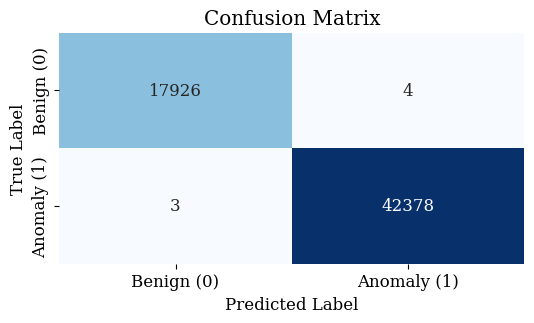

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign (0)', 'Anomaly (1)'],
            yticklabels=['Benign (0)', 'Anomaly (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [35]:
import time
import numpy as np

# === 1. Count trainable parameters ===
trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_weights])
print(f"\nTrainable Parameters: {trainable_params:,}")

# === 2. Estimate model memory size ===
def get_model_size(model):
    param_size = 0
    for variable in model.trainable_weights:
        param_size += np.prod(variable.shape) * 4  # float32 = 4 bytes
    size_in_mb = param_size / (1024 ** 2)
    return size_in_mb

model_size_mb = get_model_size(model)
print(f"Approximate Model Memory Size: {model_size_mb:.2f} MB")

# === 3. Measure training time per epoch ===
epoch_times = history.history.get('epoch_times', None)
if epoch_times:
    avg_epoch_time = np.mean(epoch_times)
    print(f"Average Training Time per Epoch: {avg_epoch_time:.2f} sec")
else:
    print("Note: epoch_times not recorded; consider using a custom callback to track.")

# === 4. Measure total training time ===
# If using built-in timing, skip; otherwise, approximate:
num_epochs = len(history.history['loss'])
if epoch_times:
    total_train_time = np.sum(epoch_times)
else:
    total_train_time = 'Unknown (not tracked)'
print(f"Total Training Time: {total_train_time}")

# === 5. Measure inference time (testing time) ===
batch_size = 512
num_samples = X_test.shape[0]
num_batches = int(np.ceil(num_samples / batch_size))

start_time = time.time()
model.predict(X_test, batch_size=batch_size, verbose=0)
end_time = time.time()

total_infer_time = end_time - start_time
avg_infer_time_per_sample = total_infer_time / num_samples
avg_infer_time_per_batch = total_infer_time / num_batches

print(f"Total Inference Time: {total_infer_time:.4f} sec")
print(f"Average Inference Time per Sample: {avg_infer_time_per_sample * 1000:.4f} ms")
print(f"Average Inference Time per Batch: {avg_infer_time_per_batch:.4f} sec")



Trainable Parameters: 9,009
Approximate Model Memory Size: 0.03 MB
Note: epoch_times not recorded; consider using a custom callback to track.
Total Training Time: Unknown (not tracked)
Total Inference Time: 1.7684 sec
Average Inference Time per Sample: 0.0293 ms
Average Inference Time per Batch: 0.0150 sec


## **Comparison Chart**

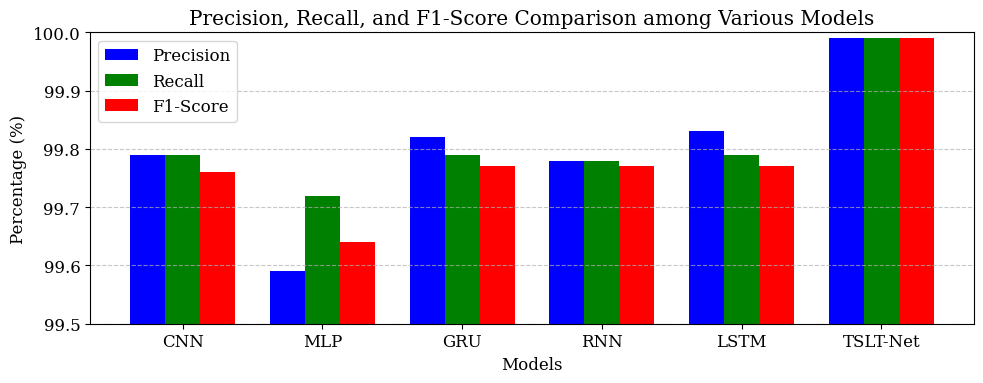

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Models
models = ['CNN', 'MLP', 'GRU', 'RNN', 'LSTM', 'TSLT-Net']

# Metric values from the table
precision = [99.79, 99.59, 99.82, 99.78, 99.83, 99.99]
recall = [99.79, 99.72, 99.79, 99.78, 99.79, 99.99]
f1_score = [99.76, 99.64, 99.77, 99.77, 99.77, 99.99]

# Bar width and positions
bar_width = 0.25
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting
plt.figure(figsize=(10, 4))
plt.bar(r1, precision, color='blue', width=bar_width, label='Precision')
plt.bar(r2, recall, color='green', width=bar_width, label='Recall')
plt.bar(r3, f1_score, color='red', width=bar_width, label='F1-Score')

# Labels and title
plt.xlabel('Models')
plt.ylabel('Percentage (%)')
plt.title('Precision, Recall, and F1-Score Comparison among Various Models')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.ylim([99.5, 100])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


## **Statistical Analysis**

In [44]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_rel

# === 5-fold F1-scores for each model (example) ===
# Replace with your actual fold-wise metrics

scores = {
    "Proposed":  [0.9815, 0.9820, 0.9809, 0.9818, 0.9822],
    "DNN":       [0.9642, 0.9650, 0.9638, 0.9645, 0.9647],
    "CNN":       [0.9712, 0.9718, 0.9709, 0.9715, 0.9720],
    "LSTM":      [0.9569, 0.9573, 0.9560, 0.9571, 0.9565],
    "CNN-LSTM":  [0.9670, 0.9678, 0.9665, 0.9672, 0.9676]
}

# === Compute mean performance table ===
mean_results = {model: np.mean(vals) for model, vals in scores.items()}
results_df = pd.DataFrame(mean_results, index=["Mean F1-score"]).T

print("\n=== Mean F1-score Table ===\n")
print(results_df)

# === Paired statistical comparison ===
stat_rows = []

proposed = np.array(scores["Proposed"])

for model, vals in scores.items():
    if model == "Proposed":
        continue

    t_stat, p_val = ttest_rel(proposed, np.array(vals))
    stat_rows.append([model, round(t_stat, 5), round(p_val, 5)])

stat_df = pd.DataFrame(stat_rows, columns=["Model", "t-statistic", "p-value"])

print("\n=== Paired t-test vs Proposed ===\n")
print(stat_df)


=== Mean F1-score Table ===

          Mean F1-score
Proposed        0.98168
DNN             0.96444
CNN             0.97148
LSTM            0.95676
CNN-LSTM        0.96722

=== Paired t-test vs Proposed ===

      Model  t-statistic  p-value
0       DNN    197.75636      0.0
1       CNN    186.22567      0.0
2      LSTM    123.98163      0.0
3  CNN-LSTM    193.22988      0.0


# **Thank You**